# Linear Regression from Scratch with NumPy

Here we implement linear regression from scratch with NumPy to get a solid understanding of the algorithm.

## The Data
We want to fit our model on the [diabetes dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html). It consits of 442 samples with 10 features and one target value.

## The Linear Model
Our linear regression model is definded as $f_{w,b}(x) = x_1 \cdot w_1 + b_1 + x_2 \cdot w_2 + b_2 +  \ldots  + x_n \cdot w_n + b_n$, with $x$ beeing one sample of our dataset with $n$ features and $w$ and $b$ are the parameters, or the weights and biases of our model. Using the *threshold-trick* we can simplify the model by setting $x_0=1$ and introducing a weight $w_0$ to $f_w(x) = x_0 \cdot w_0 + x_1 \cdot w_1 + \ldots + x_n \cdot w_n$. To leverage the *vectorizing capabilities* of NumPy we implent our linear model as $f_w(X) = X \cdot w$ using the whole dataset $X$.

If our dataset has $m$ samples, the dimensions of the matrices after the threshold-trick are as follows:

$X \in \mathbb{R}^{m \times n+1}$, $w \in \mathbb{R}^{n+1}$.

## The Loss Function
As loss-function we use the Mean Squared Error $L(y, \hat{y})=\frac{1}{n}\sum_{i=1}^n (y_i-\hat{y}_i)^2$, with $y$ beeing the target value and $\hat{y}$ beeing the predicted value.

## Gradient Descent
Our goal is to change the weights in such a way, that it minimizes our loss function and improves the regression accuracy of our model. Therefore we have to determine how the loss $L(y, \hat{y})=\frac{1}{n}\sum_{i=1}^n (y_i-\hat{y}_i)^2$ changes with respect to all the weights.

Let's start by looking at the loss of one single example $i$: $L_i=(y_i-\hat{y}_i)^2$. To determine how we have to change a sepecific weight $w_j$ to minimize the loss of $i$, we calculate the partial derivative of the loss with respect to that specific weight:

$
\begin{split}
\frac{\partial L_i}{\partial w_j}&=\frac{\partial L_i}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial w_j}\\
&=\frac{\partial (y-\hat{y})^2}{\partial \hat{y}} \frac{\partial w_0x_o+...w_jx_j+...w_nx_n}{\partial w_j}\\
&=-2(y-\hat{y})x_j
\end{split}
$

Ok, that's cool. How do we do that for say $m$ samples and the full loss function? That's straight-forward, we just determine the partial derivatives for each sample and determine the mean (as in the full loss function):

$
\begin{split}
\frac{\partial L}{\partial w_n}=\frac{1}{m}\sum_{i=1}^m \frac{\partial L_i}{\partial w_n}
\end{split}
$

And to determine the gradient vector $\nabla L$ we have to compute the partial derivatives of the loss with respect to all weights:

$
\begin{split}
\nabla L = (\frac{\partial L}{w_0}, \ldots, \frac{\partial L}{w_n})^T
\end{split}
$

Now we have everything together to start the learning process which consists of just one step for each epoch: $w = w - l * \nabla L$, with $l$ beeing the learning rate of our algorithm. As you see below in the code this step can easily be vectorized.

In [1]:
import numpy as np
from sklearn.datasets import load_boston, load_diabetes
import matplotlib.pyplot as plt

In [2]:
data = load_diabetes()

X = data.data
# a kind of transpose
y = data.target.reshape(-1,1)

# normalize the data
# * free from mean value
# * normalize to uniform standard derivation
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# threshold trick
X = np.hstack((np.ones((len(y), 1)),X))
w = np.zeros((np.size(X, 1), 1))

print(f"Shape of X: {X.shape}")
print(f"Shape of w: {w.shape}")

Shape of X: (442, 11)
Shape of w: (11, 1)


In [3]:
def lin_model(X, W):
  return X @ W

def mse(y, pred):
  return ((pred - y) ** 2).mean()

def gradient_descent(X, y, w, learning_rate, epochs):
    history = []

    for i in range(epochs):
        w = w - (learning_rate / len(y)) * X.T @ (2 * (lin_model(X, w) - y)) 
        history.append(mse(y, lin_model(X, w)))

    return np.array(history), w

In [4]:
epochs = 1000
learning_rate = 0.01

history, w = gradient_descent(X, y, w, learning_rate, epochs)

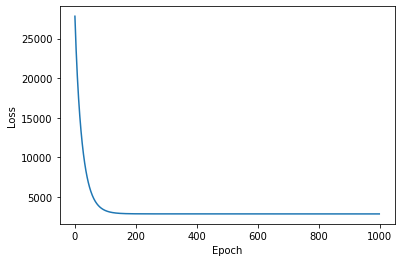

Initial loss:  27824.334529945434
Final loss:  2875.6162182266353


In [5]:
plt.plot(range(len(history)), history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

print("Initial loss: ", history[0])
print("Final loss: ", history[-1])